### 例8-1：绘制股票收盘价的时序图，并提取该时序数据的常用特征值。

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

plt.rcParams['font.sans-serif'] = ['SimHei']  #设置中文字体
#设置usecols，从文件中只读取指定列
df = pd.read_csv('data/stockPrice.csv', index_col = 0, usecols=[0,1])
print(df.describe()) 

            close
count  249.000000
mean   150.827892
std     14.347368
min    116.610000
25%    142.270000
50%    152.760000
75%    159.860000
max    176.420000


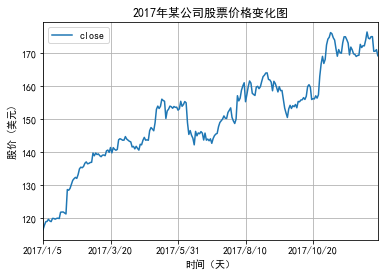

In [2]:
#绘制时序图，并添加图元
df.plot(title='2017年某公司股票价格变化图', grid=True)
plt.xlabel('时间（天）')
plt.ylabel('股价 (美元)')
plt.show() 

### 例8-2 ARIMA建模分析

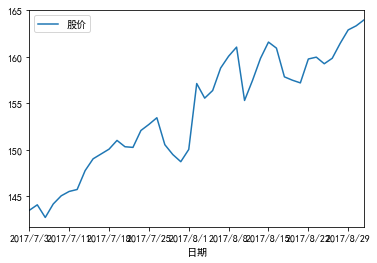

In [10]:
#1）绘制时序图
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('data/stockClose.csv', index_col = '日期',encoding='gbk')
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
data.plot()
plt.show()

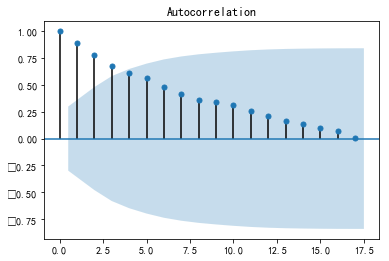

白噪声-检验结果： (array([36.25689108]), array([1.72947396e-09]))
ADF-检验结果： (-1.1405685913236345, 0.6986255799201098, 6, 36, {'1%': -3.626651907578875, '10%': -2.6116707716049383, '5%': -2.9459512825788754}, 139.60845303017535)


In [13]:
#2）纯随机性和平稳性检验
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data)                           #自相关图
plt.show()
from statsmodels.stats.diagnostic import acorr_ljungbox
print('白噪声-检验结果：', acorr_ljungbox(data['股价'], lags=1))
from statsmodels.tsa.stattools import adfuller as ADF
print('ADF-检验结果：', ADF(data['股价']))

D:\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


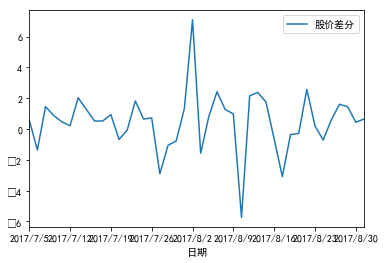

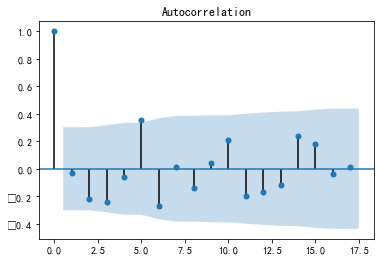

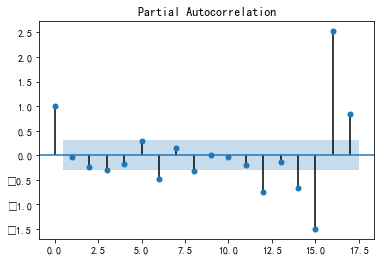

差分序列－ADF－检验结果为： (-3.5102690762978335, 0.007727246001738179, 5, 36, {'1%': -3.626651907578875, '10%': -2.6116707716049383, '5%': -2.9459512825788754}, 134.62668560027245)


In [16]:
#3）差分转换
from statsmodels.graphics.tsaplots import plot_pacf
D_data = data.diff().dropna() #对原数据进行1阶差分，删除非法值
D_data.columns = ['股价差分']
D_data.plot()  #时序图
plot_acf(D_data) #自相关图
plot_pacf(D_data) #偏自相关图
plt.show()
print('差分序列－ADF－检验结果为：', ADF(D_data[u'股价差分'])) #平稳性检测

In [20]:
#4)定阶
from statsmodels.tsa.arima_model import ARIMA
data['股价'] = data['股价'].astype(float)
pmax = int(len(D_data)/10) #一般阶数不超过length/10
qmax = int(len(D_data)/10) #一般阶数不超过length/10
e_matrix = [] #评价矩阵
for p in range(pmax+1):
    tmp = []
    for q in range(qmax+1):
        try: #存在部分报错，所以用try来跳过报错。
            tmp.append(ARIMA(data, (p,1,q)).fit().aic)
        except:
            tmp.append(None)
    e_matrix.append(tmp)
e_matrix = pd.DataFrame(e_matrix) #从中可以找出最小值
p,q = e_matrix.stack().idxmin() #先用stack展平，然后用找出最小值位置。
print('AIC最小的p值和q值为：%s、%s' %(p,q))

D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored

AIC最小的p值和q值为：4、1


D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [21]:
#5）预测
model = ARIMA(data, (p,1,q)).fit() #建立ARIMA(4,1,1)模型
model.summary2() #给出模型报告
model.forecast(5)   #作为期5天的预测，返回预测结果、标准误差、置信区间。

D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


(array([164.03883763, 164.46585621, 165.14542918, 165.63406322,
        166.30831966]),
 array([1.47752259, 2.22920781, 2.42886628, 2.57770729, 2.61590431]),
 array([[161.14294656, 166.9347287 ],
        [160.09668919, 168.83502323],
        [160.38493875, 169.90591962],
        [160.58184976, 170.68627668],
        [161.18124143, 171.43539789]]))

### 例8-3： 使用百度API识别语音对应文本

In [23]:
from aip import AipSpeech      #导入语音识别包
def get_file_content(file_name):          #从文件中提取语音内容
    with open(file_name, 'rb') as fp:
        return fp.read()

In [30]:
APP_ID = '10694657'
API_KEY = 'qtCumlQUdEk4dKpZItWFGY6a'
SECRET_KEY = 'bab91297af93124058a910c2c962ccae'
aipSpeech = AipSpeech(APP_ID, API_KEY, SECRET_KEY)#初始化识别模型
file_name='data/voice.wav'           #语音文件
result = aipSpeech.asr(get_file_content(file_name), 'wav', 16000, {'dev_ip': '1536'})
print (result['result'][0])


数据智能分析技术。
